In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [2]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
# Categorizing based on Income as "Good" & "Risky"
data.loc[data['Taxable.Income']>=30000,'Income']='Good'
data.loc[data['Taxable.Income']<30000,'Income']='Risky'

In [4]:
# Converting categorical variables into numerical variables
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype==object:
        data[column_name]=le.fit_transform(data[column_name])
    else:
        pass

In [11]:
data=data.rename(columns={'Taxable.Income':'TaxInc'})
data

,Undergrad,Marital.Status,TaxInc,City.Population,Work.Experience,Urban,Income
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [13]:
pd.value_counts(data.Income)

0    476
1    124
Name: Income, dtype: int64

In [16]:
data.drop(['TaxInc'],axis=1,inplace=True)
data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [18]:
x=data.iloc[:,0:5]
y=data.iloc[:,5]

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
# Creating the model
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
# Predicting
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [23]:
pd.crosstab(y_pred,y_test)

Income,0,1
row_0,,
0,68,18
1,29,5


In [25]:
np.mean(y_pred==y_test)

0.6083333333333333

[Text(491.8473704268293, 890.9, 'Work.Experience <= 24.5\nentropy = 0.742\nsamples = 480\nvalue = [379, 101]'),
 Text(229.4874237804878, 860.7, 'Work.Experience <= 6.5\nentropy = 0.774\nsamples = 369\nvalue = [285, 84]'),
 Text(102.07317073170732, 830.5, 'Urban <= 0.5\nentropy = 0.607\nsamples = 94\nvalue = [80, 14]'),
 Text(45.36585365853659, 800.3, 'City.Population <= 37726.5\nentropy = 0.391\nsamples = 39\nvalue = [36, 3]'),
 Text(22.682926829268293, 770.1, 'City.Population <= 32282.0\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(11.341463414634147, 739.9, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(34.02439024390244, 739.9, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(68.04878048780488, 770.1, 'Marital.Status <= 1.5\nentropy = 0.31\nsamples = 36\nvalue = [34, 2]'),
 Text(56.707317073170735, 739.9, 'entropy = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(79.39024390243902, 739.9, 'Work.Experience <= 4.5\nentropy = 0.567\nsamples = 15\nvalue = [13, 2]'),
 Text

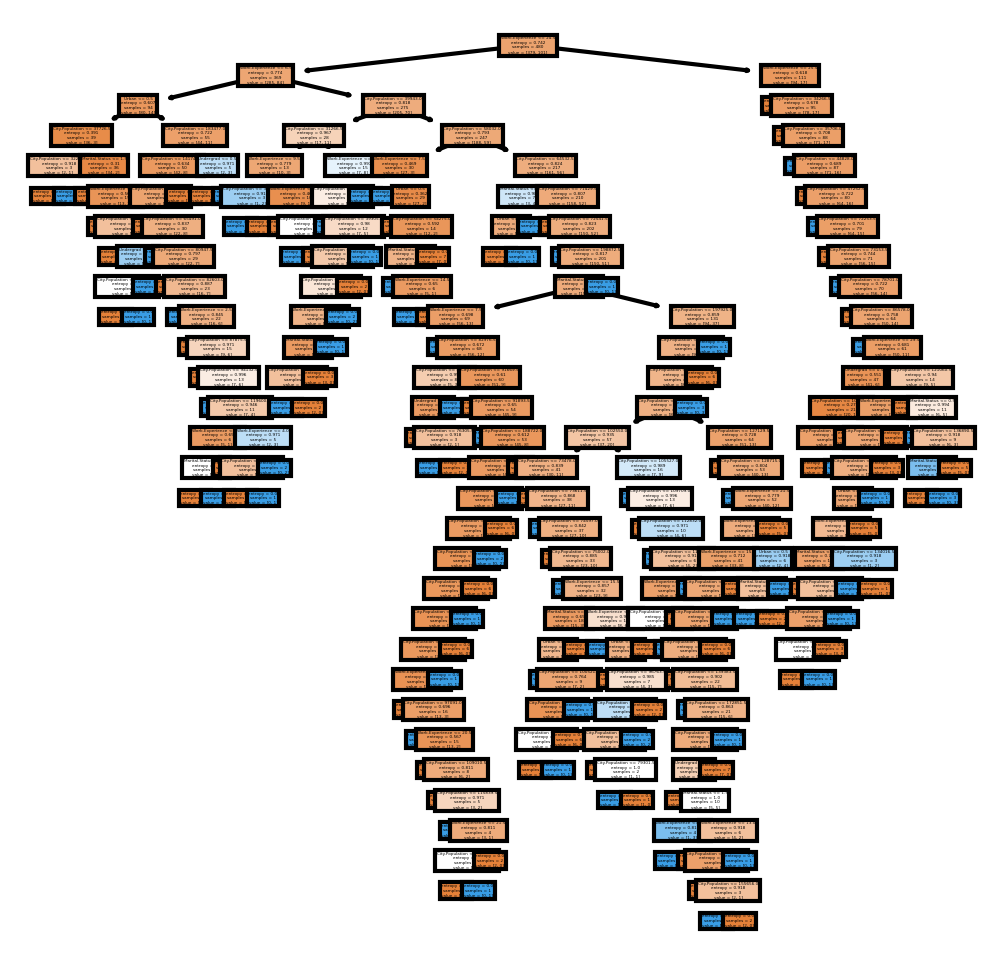

In [28]:
# Creating Tree
import matplotlib.pyplot as plt
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban','Income']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,filled=True)